In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
df.shape

(505, 14)

In [38]:
# Find missing values
print('Missing values:{}'.format(df.isnull().any().sum()))
# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

Missing values:0

Number of duplicated records: 0


In [42]:
X=df.drop("MEDV",axis=1)
y=df.iloc[:,-1].values #df.loc[:,['MDEV']]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.7179959665986309
0.7846203049967412


In [52]:
prediction=reg.predict(X_test)

array([18.96673336, 18.88096313, 11.23448852, 36.49644019, 23.73430667,
       18.70856108, 22.01819484, 29.11794698, 27.79577282, -3.68067135,
       23.19716934, 18.61875278, 16.80451194, 23.37601317, 36.51909443,
       13.76130946, 34.79223318, 32.25881631, 24.91439221, 16.66890621,
       23.9303887 , 19.32254239, 13.92661218, 17.58362819, 20.52296768,
       21.51990863, 14.25854823, 13.60585558, 18.81749321, 22.57784417,
       19.15909919, 13.19380935, 13.84314344, 36.6125477 , 15.16870246,
       15.94689683, 31.48197326, 28.61776248, 24.47721666, 28.76825209,
       16.09790131, 30.61090796, 18.18449259, 28.53896343, 33.91762622,
       33.469161  , 18.30822094, 23.68950966, 27.68715372, 23.13550284,
       29.83212492, 20.90958974, 19.02589148, 15.92375939, 19.47784009,
       15.09958585, 17.39147254, 37.69727002, 18.2718769 , 25.43386676,
       21.86023003, 25.33782886,  8.87368633, 24.30970621, 31.11495787,
       21.5011899 , 17.52407068, 19.39023584, 14.06201701, 34.37

In [51]:
print(prediction.shape)
print(X_test.shape)

(152,)
(152, 13)


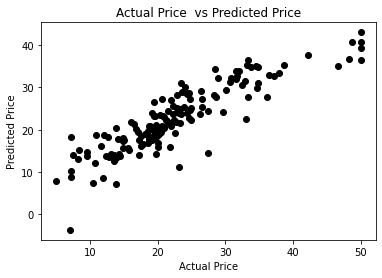

In [55]:
import matplotlib
%matplotlib inline
matplotlib.pyplot.scatter(y_test,prediction,color='black')

#draw a line  through the middle showing the fit we choosed max and many to got the range of it
x0=min(y_test)
x1=max(y_test)
y0=min(prediction)
y1=max(prediction)

#plt.plot([x0,x1],[y0,y1],color="red")

#add labels

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price  vs Predicted Price')
plt.show()